In [1]:
import numpy as np
import matplotlib.pyplot as plt

# These two lines are required to use Tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()
# Let's assume some artificial data with three input (if our objective is to predict words in a sentence
n_inputs = 3  # then for instance: first word, second word, third word can be the input of our model)
n_neurons = 5 # number of neurons

X0 = tf.placeholder(tf.float32, [None, n_inputs]) # t=0 batch
X1 = tf.placeholder(tf.float32, [None, n_inputs]) # t=1 batch

# Weights on inputs (all steps share this), initialy they are set random
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))

# Connection weights for the outputs of the previous timestep (all steps share this), initialy they are set random 
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))

# bias vector, all zeros for now
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# outputs of timestep 0
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)

# outputs of timestep 1
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)
# Y1 = activation_function(dot_product(Y0, Wy) + dot_product(X1, Wx) + bias_vector)

init = tf.global_variables_initializer()

# Mini-batch:        instance1  instance2   instance3 instance4
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0 
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1 

# within the session
with tf.Session() as sess:
    init.run()
    # get the outputs of each step
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
print(Y0_val) # layers output at t=0

[[ 0.12020043  0.44310325  0.01446921 -0.84993863  0.99186003]
 [-0.94592494  0.6544402  -0.99291945 -0.999994    1.        ]
 [-0.9987877   0.796866   -0.9999755  -1.          1.        ]
 [-0.97810954  0.9999704  -0.5441994  -1.          0.9960072 ]]


In [5]:
print(Y1_val) # layers output at t=1

[[-1.         -0.90785277 -1.         -1.          1.        ]
 [ 0.46041214 -0.9532765  -0.96369916  0.9714266   0.16984604]
 [-0.9976139  -0.94382596 -1.         -0.99999785  1.        ]
 [-0.97473055 -0.9506037  -0.9999533  -0.9910697   0.99739045]]


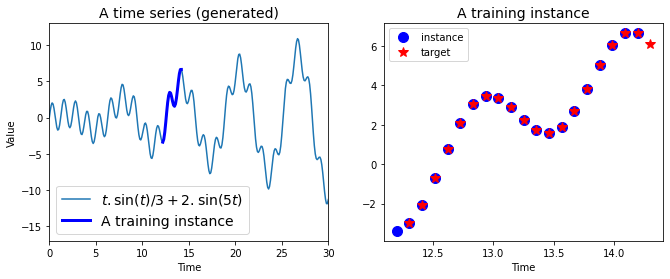

In [6]:
reset_graph()
# time starts from 0 to 30
t_min, t_max = 0, 30
# we sample time_series function for every 0.1 
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    """
    Returns a batch with `n_steps`: number of instances
    """
    # randomly get a starting number between a range
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    # make a list until of number with n_steps until the next batch
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    # get the outputs of time_series function given the input Ts (time points)
    ys = time_series(Ts)
    
    # return X's and Y's
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

# inputs to the time_series function
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
# a training instance
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
# plot all the data
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")

# plot only the training set
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
# notice that targets are shifted by one time step into the future
plt.plot(t_instance[1:], time_series(t_instance[1:]), "r*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [7]:
X_batch, y_batch = next_batch(1, n_steps)

# combining X_batch and y_batch for better printing, first_column=X, second_column=Y
print(np.c_[X_batch[0], y_batch[0]])
# Did you notice the shift in y values?

[[-1.40208096 -2.33035999]
 [-2.33035999 -3.4513234 ]
 [-3.4513234  -4.52641909]
 [-4.52641909 -5.32081479]
 [-5.32081479 -5.66045846]
 [-5.66045846 -5.47433377]
 [-5.47433377 -4.81157012]
 [-4.81157012 -3.82922233]
 [-3.82922233 -2.75371563]
 [-2.75371563 -1.82539786]
 [-1.82539786 -1.23977629]
 [-1.23977629 -1.0998269 ]
 [-1.0998269  -1.39105208]
 [-1.39105208 -1.98539218]
 [-1.98539218 -2.67303091]
 [-2.67303091 -3.214304  ]
 [-3.214304   -3.39899794]
 [-3.39899794 -3.09851497]
 [-3.09851497 -2.29812628]
 [-2.29812628 -1.10140997]]


In [9]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1
learning_rate = 0.001
n_iterations = 1500
batch_size = 50


# Optimizer that finds the weight values for each neuron
def get_predictions(optimizer="gdo", 
                    loss_function="mse",
                    save=False,
                    reset=True):
    reset_graph()   
    X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
    y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

    # We use `dynamic_rnn` and `BasicRNNCell` utilities in this case, with tf.nn.relu
    cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
    rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

    # This part is visually shown in the book Figure 14-10.
    stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])

    # What do you think line below will be doing? (Tip: https://www.tensorflow.org/api_docs/python/tf/layers/dense)
    stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)

    outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
    
    if optimizer == "gdo":
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        
    
    # The loss function to optimize
    if loss_function == "mse":
        loss = tf.reduce_mean(tf.square(outputs - y))
    elif loss_function == "rmse":
        loss = tf.sqrt(tf.reduce_mean(tf.squared_difference(outputs, y)))

    # Let the optimizer know that this is the loss function to optimize
    training_op = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    y_pred = None
    with tf.Session() as sess:
        init.run()
        for iteration in range(n_iterations):
            # get a random batch 
            X_batch, y_batch = next_batch(batch_size, n_steps)
            # run tensorflow session
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            # in each 100th iteration
            if iteration % 100 == 0: # with RSME
                loss_val = loss.eval(feed_dict={X: X_batch, y: y_batch})
                # print the MSE
                print(iteration, "\t{}:".format(loss_function), loss_val)

        X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
        y_pred = sess.run(outputs, feed_dict={X: X_new})
        if save:
            saver.save(sess, "./my_time_series_model_" + loss_function)
    if reset:
        reset_graph()   
    
    return y_pred, saver, outputs, X

In [10]:
y_mse_pred, _, _, _ = get_predictions(optimizer="gdo", loss_function="mse")
y_rmse_pred, _, _, _ = get_predictions(optimizer="gdo", loss_function="rmse", save=True)
y_mse_pred, y_rmse_pred

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
0 	mse: 15.290498
100 	mse: 1.0960666
200 	mse: 0.5935831
300 	mse: 0.38848212
400 	mse: 0.30975834
500 	mse: 0.26502177
600 	mse: 0.23514935
700 	mse: 0.19447993
800 	mse: 0.18046959
900 	mse: 0.18789752
1000 	mse: 0.1722896
1100 	mse: 0.17576745
1200 	mse: 0.13654596
1300 	mse: 0.16540909
1400 	mse: 0.12645036
0 	rmse: 4.085475
100 	rmse: 2.0062304
200 	rmse: 1.3428605
300 	rmse: 1.0885211
400 	rmse: 0.8548928
500 	rmse: 0.7382887
600 	rmse: 0

(array([[[-3.5954242],
         [-3.0966706],
         [-1.4318905],
         [ 0.587713 ],
         [ 2.4316795],
         [ 3.054192 ],
         [ 3.4978259],
         [ 3.6393085],
         [ 3.0505826],
         [ 2.1691704],
         [ 1.4808145],
         [ 1.2812839],
         [ 1.5920242],
         [ 2.5071013],
         [ 3.6308975],
         [ 4.7512426],
         [ 5.8542075],
         [ 6.6252127],
         [ 6.7169466],
         [ 6.1809053]]], dtype=float32),
 array([[[-3.5307333 ],
         [-3.1880894 ],
         [-1.5144346 ],
         [ 0.54980105],
         [ 2.4140139 ],
         [ 3.0532303 ],
         [ 3.5285497 ],
         [ 3.6970208 ],
         [ 3.1041813 ],
         [ 2.180255  ],
         [ 1.474451  ],
         [ 1.2718196 ],
         [ 1.5662479 ],
         [ 2.456852  ],
         [ 3.582528  ],
         [ 4.706657  ],
         [ 5.842655  ],
         [ 6.611411  ],
         [ 6.7048054 ],
         [ 6.156064  ]]], dtype=float32))

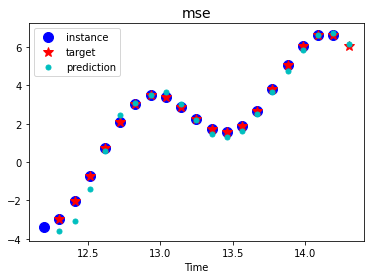

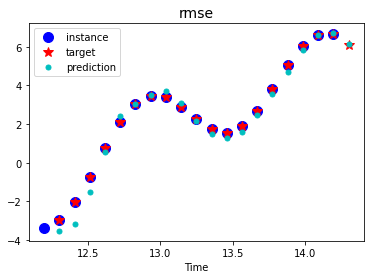

In [11]:
def plot_results(title, y_vals):
    plt.title(title, fontsize=14)
    plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
    plt.plot(t_instance[1:], time_series(t_instance[1:]), "r*", markersize=10, label="target")
    plt.plot(t_instance[1:], y_vals[0,:,0], "c.", markersize=10, label="prediction")
    plt.legend(loc="upper left")
    plt.xlabel("Time")

    plt.show()


plot_results("mse", y_mse_pred)
plot_results("rmse", y_rmse_pred)

0 	mse: 15.461619
100 	mse: 0.6994408
200 	mse: 0.24120393
300 	mse: 0.14760248
400 	mse: 0.08330615
500 	mse: 0.072602466
600 	mse: 0.05712897
700 	mse: 0.0532711
800 	mse: 0.053617176
900 	mse: 0.04871455
1000 	mse: 0.048705053
1100 	mse: 0.054874968
1200 	mse: 0.04163756
1300 	mse: 0.04952288
1400 	mse: 0.044527803
INFO:tensorflow:Restoring parameters from ./my_time_series_model_mse


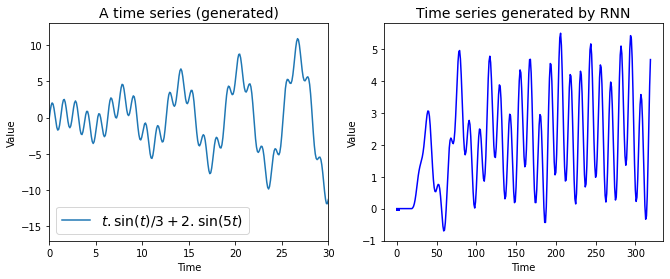

In [12]:
# since the graph is reset, let's train again:
loss_function = "mse"
_, saver, outputs, X = get_predictions(optimizer="adam", loss_function=loss_function, save=True, reset=False) 

with tf.Session() as sess:                     
    saver.restore(sess, "./my_time_series_model_"+loss_function)

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])
        
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
# plot all the data
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")


plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("Time series generated by RNN", fontsize=14)

plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")


plt.show()